In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
import seaborn as sns
from datetime import datetime, date
import numpy as np
import pickle

In [3]:
jdict= json.load((open('ultimate_data_challenge.json')))


In [4]:
ulti_df= json_normalize(jdict)
ulti_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


Part One

In [5]:
logins= pd.read_json('logins.json')

In [6]:
logins.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


These dates say 1970 but they are most likely in 2014 based on the other dataset. We need to change these dates to in order to analyze how the day of the week affects logins.

In [7]:
logins.login_time= logins.login_time.apply(lambda x:datetime(year=2014, month= x.month, 
                   day=x.day, hour=x.hour, minute=x.minute, second=x.second))

logins.tail()

,login_time
93137,2014-04-13 18:50:19
93138,2014-04-13 18:43:56
93139,2014-04-13 18:54:02
93140,2014-04-13 18:57:38
93141,2014-04-13 18:54:23


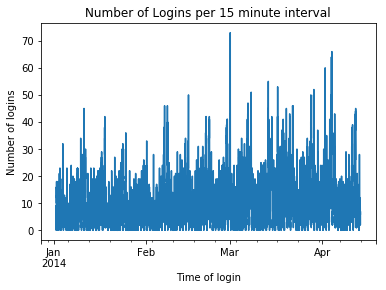

In [8]:
inter=logins.groupby(logins.login_time).size().resample('15T').sum()
inter.plot(x=inter.index,y=inter.values)
plt.title('Number of Logins per 15 minute interval')
plt.xlabel('Time of login')
plt.ylabel('Number of logins')
plt.show()

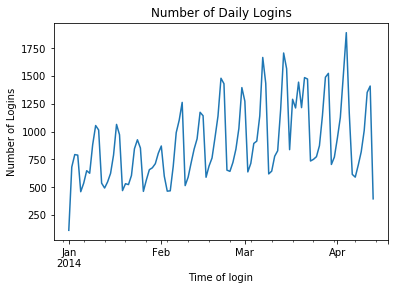

In [9]:
daily=logins.groupby(logins.login_time).size().resample('1D').sum()
daily.plot(x=daily.index,y=daily.values)
plt.xlabel('Time of login')
plt.ylabel('Number of Logins')
plt.title('Number of Daily Logins')
plt.show()

In [10]:
def weekday(cell):
    new=cell.weekday()
    if new==0:
        new='Mon'
    if new==1:
        new='Tues'
    if new==2:
        new='Wed'
    if new==3:
        new='Thurs'
    if new==4:
        new='Fri'
    if new==5:
        new='Sat'
    if new==6:
        new='Sun'
    return (new)

dates= pd.Series(logins['login_time'])
weekdays=dates.apply(weekday)


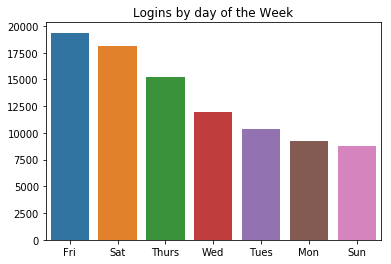

In [11]:
sns.barplot(x=weekdays.value_counts().index, y=weekdays.value_counts().values)
plt.title('Logins by day of the Week')
plt.show()

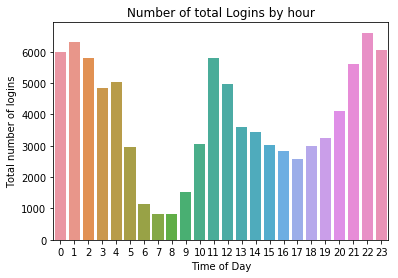

In [12]:
hours= inter.groupby(inter.index.hour).sum()
sns.barplot(x=hours.index, y= hours.values)
plt.xlabel('Time of Day')
plt.ylabel('Total number of logins')
plt.title('Number of total Logins by hour')
plt.show()

The day to day demand for rides appears to fluctuate dramatically. Demand for rides peak on Friday and Saturday while it is at its lowest on sundays. Riders appear to use the service when they are going out as evidenced by the increased reletive use between the hours of 9pm and 2am. 

Part Two

1. Assumng we are using just the login data, the best measure would be the difference in means between day and night. This could be coded by resampling to every 6 hours and combining the 6am-12pm and the 12pm-6pm for day time and the other two for night. Comparing the difference in means for before and after the policy change should show its effectiveness. If the difference is closer to zero it shows that drivers are going across the bridge because they are logging in when previously they would not. Additionally I would eliminate the weekend data from this experiment because the two cities have similar traffic during that time which may confound my results. 

2. If I were performing this experiment I would use an A/B test where some drivers would have tolls reimbursed and other would have to pay them on their own. I believe permutation sampling with replacement would be ideal in this situation because it would show us whether the changes in the mean were due to randomness or if a substantial change had been made. As previously stated the closer the absolute difference between the numbers is to zero the more effective the policy is in getting drivers across the bridge. One caveat is obviously that we are not measuring where the drivers are coming from or going so it is possible that increased logins could be due to special events in the area or other factors. A more ideal measure would be the distance each driver travels because it would be reasonable for that number to be larger with free tolls. 

Part 3

In [13]:
ulti_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [14]:
ulti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [15]:
ulti_df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [16]:
ulti_df=ulti_df[ulti_df.avg_rating_by_driver.notnull()
                & ulti_df.avg_rating_of_driver.notnull()]
ulti_df['phone']=ulti_df['phone'].fillna('Computer')
ulti_df.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64

In [17]:
ulti_df.last_trip_date=ulti_df.last_trip_date.astype('datetime64')
ulti_df.signup_date=ulti_df.signup_date.astype('datetime64')
ulti_df.last_trip_date.max()

Timestamp('2014-07-01 00:00:00')

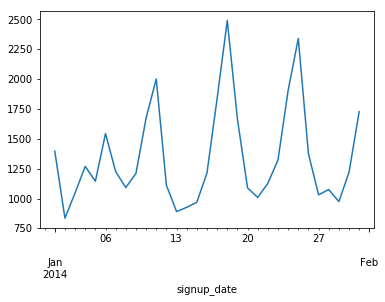

In [18]:
df_time=ulti_df[['signup_date', 'last_trip_date']].copy()
df_time['count']=1
df_time=df_time.set_index('signup_date')
df_time['count'].resample('1D').sum().plot()

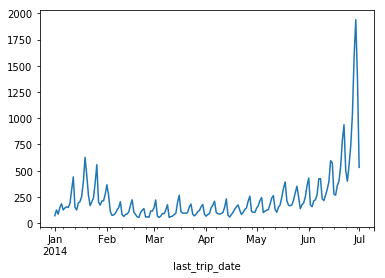

In [19]:
df_time=df_time.set_index('last_trip_date')
df_time['count'].resample('1D').sum().plot()

It appears that most users last trip was in june. This is most likely because the data was collected in july. We will count these users as retained. It may be insightful to include a retention length variable as well.

In [20]:
ret_len=(ulti_df.last_trip_date-
                    ulti_df.signup_date)

ulti_df['ret_len']= ret_len.apply(lambda x: x.days)

In [21]:
retained= ulti_df.last_trip_date>='2014-06-01'
ulti_df['retained']= retained.astype('int')


In [22]:
ulti_df['signup_weekday']= ulti_df['signup_date'].apply(weekday)


In [23]:
ulti_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,ret_len,retained
count,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000,41744.000000
mean,5.465312,4.776648,4.601801,1.073697,8.884695,2.611393,61.304437,98.049324,0.411029
std,5.149810,0.404109,0.616079,0.198681,18.309042,4.060121,34.799944,61.229764,0.492026
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,37.500000,38.000000,0.000000
50%,3.790000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,118.000000,0.000000
75%,6.490000,5.000000,5.000000,1.070000,11.100000,3.000000,100.000000,152.000000,1.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,181.000000,1.000000


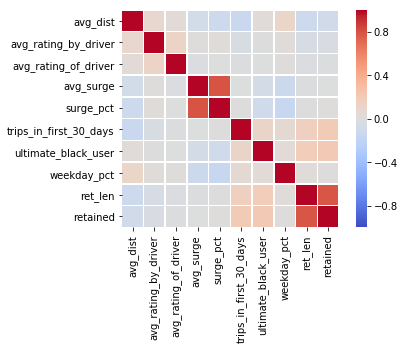

In [24]:
#Lets see what factors are most highly correlated
cor=ulti_df.corr()
sns.heatmap(cor, square=True, cmap="coolwarm", linewidth=.5, vmin=-1, vmax=1)

In [25]:
cor

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,ret_len,retained
avg_dist,1.000000,0.083869,0.034806,-0.085768,-0.111075,-0.136301,0.026552,0.102703,-0.110686,-0.090240
avg_rating_by_driver,0.083869,1.000000,0.123175,0.012171,0.019316,-0.045916,0.005553,0.019141,-0.048657,-0.035185
avg_rating_of_driver,0.034806,0.123175,1.000000,-0.022229,-0.001822,-0.011546,-0.002628,0.013673,-0.017432,-0.012084
avg_surge,-0.085768,0.012171,-0.022229,1.000000,0.795758,-0.000306,-0.071582,-0.118818,-0.013630,-0.003565
surge_pct,-0.111075,0.019316,-0.001822,0.795758,1.000000,0.005371,-0.100878,-0.154953,0.007608,0.011384
trips_in_first_30_days,-0.136301,-0.045916,-0.011546,-0.000306,0.005371,1.000000,0.115334,0.054933,0.157306,0.198715
ultimate_black_user,0.026552,0.005553,-0.002628,-0.071582,-0.100878,0.115334,1.000000,0.033930,0.183450,0.216429
weekday_pct,0.102703,0.019141,0.013673,-0.118818,-0.154953,0.054933,0.033930,1.000000,0.015797,0.010368
ret_len,-0.110686,-0.048657,-0.017432,-0.013630,0.007608,0.157306,0.183450,0.015797,1.000000,0.783174
retained,-0.090240,-0.035185,-0.012084,-0.003565,0.011384,0.198715,0.216429,0.010368,0.783174,1.000000


The variables most correlated with retention and retention length are ultimate_black_users and trips_in_first_30_days. Both of these make sense. Users ordering black cars are probably more avid users of the service and are more likely to have a good expirience in the pricier car. Alot of use in the first 30 days active shows that a user had a real need for the platform. Average distance also had a reletively strong negative effect. This may reflect people who used the app to make long infrequent trips. It could also be that people with longer trips have more oppuritunity to have a bad expirience with their driver. Next lets look at our categorical variables.

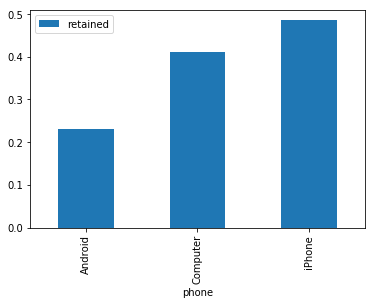

In [26]:

ulti_df[['phone','retained']].groupby('phone').mean().plot(kind='bar')

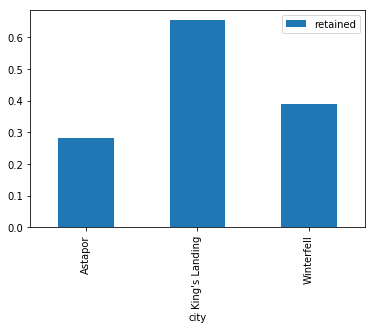

In [27]:
ulti_df[['city','retained']].groupby('city').mean().plot(kind='bar')

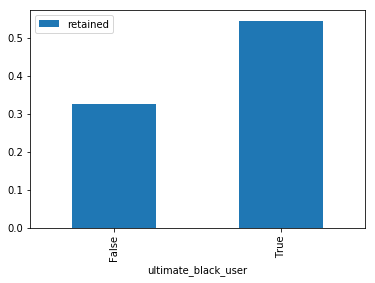

In [28]:
ulti_df[['ultimate_black_user','retained']].groupby('ultimate_black_user').mean().plot(kind='bar')

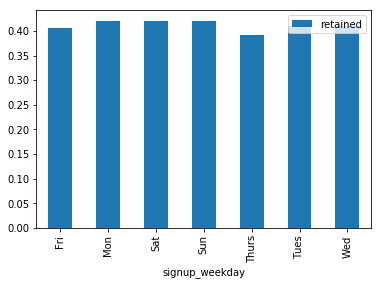

In [29]:
ulti_df[['signup_weekday','retained']].groupby('signup_weekday').mean().plot(kind='bar')

It appears users from King's Landing are retained at higher rates than those from other cities. Additionally, iPhone users retain at higher rates than android users.

In [30]:
ulti_df.groupby('retained').mean()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,ret_len
retained,,,,,,,,,
0,5.853530,4.788526,4.608021,1.074288,8.710583,1.937403,0.297608,61.003018,57.989872
1,4.909027,4.759628,4.592890,1.072849,9.134182,3.577165,0.511715,61.736345,155.451218


In [31]:
def ecdf(data):
    '''Function gives the x and y of a cumulative distribution function'''
    x= np.sort(np.array(data))
    n=float(len(data))
    y= (np.arange(1,n+1))/n
    return x,y
retained=ulti_df[ulti_df.retained==1]
unretained=ulti_df[ulti_df.retained==0]

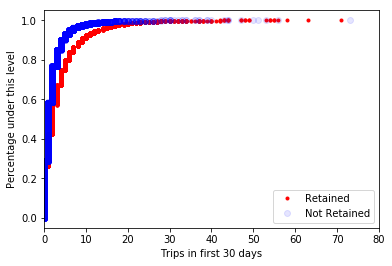

In [32]:
ret_tripx, ret_tripy=ecdf(retained.trips_in_first_30_days)
unret_tripx, unret_tripy=ecdf(unretained.trips_in_first_30_days)
#Plot both lines
plt.plot(ret_tripx,ret_tripy, color='red', linestyle='none', marker='.',)
plt.plot(unret_tripx,unret_tripy, color='blue' , linestyle='none', marker='o', alpha=.1)
#Label Axis
plt.xlabel('Trips in first 30 days')
plt.ylabel('Percentage under this level')
plt.xlim(0,80)
#Add Legend
plt.legend(('Retained', 'Not Retained'),loc='lower right')
plt.show()


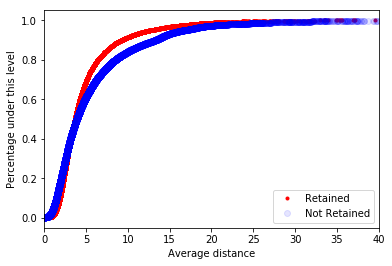

In [33]:
ret_distx, ret_disty=ecdf(retained.avg_dist)
unret_distx, unret_disty=ecdf(unretained.avg_dist)
#Plot both lines
plt.plot(ret_distx,ret_disty, color='red', linestyle='none', marker='.',)
plt.plot(unret_distx,unret_disty, color='blue' , linestyle='none', marker='o', alpha=.1)
#Label Axis
plt.xlabel('Average distance')
plt.ylabel('Percentage under this level')
plt.xlim(0,40)
#Add Legend
plt.legend(('Retained', 'Not Retained'),loc='lower right')
plt.show()


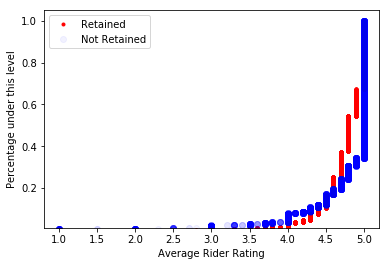

In [34]:
ret_rrx, ret_rry=ecdf(retained.avg_rating_by_driver)
unret_rrx, unret_rry=ecdf(unretained.avg_rating_by_driver)
#Plot both lines
plt.plot(ret_rrx,ret_rry, color='red', linestyle='none', marker='.',)
plt.plot(unret_rrx,unret_rry, color='blue' , linestyle='none', marker='o', alpha=.05)
#Label Axis
plt.xlabel('Average Rider Rating')
plt.ylabel('Percentage under this level')
plt.ylim(.01)
#Add Legend
plt.legend(('Retained', 'Not Retained'),loc='upper left')
plt.show()

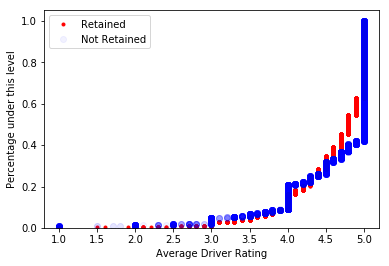

In [35]:
ret_drx, ret_dry=ecdf(retained.avg_rating_of_driver)
unret_drx, unret_dry=ecdf(unretained.avg_rating_of_driver)
#Plot both lines
plt.plot(ret_drx,ret_dry, color='red', linestyle='none', marker='.',)
plt.plot(unret_drx,unret_dry, color='blue' , linestyle='none', marker='o', alpha=.05)
#Label Axis
plt.xlabel('Average Driver Rating')
plt.ylabel('Percentage under this level')
plt.ylim(.001)
#Add Legend
plt.legend(('Retained', 'Not Retained'),loc='upper left')
plt.show()

Unretained riders are more likely to give and get 5 star ratings but are also more likely to receive lower ratings. 

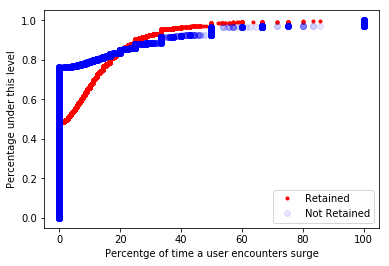

In [36]:
ret_surgx, ret_surgy=ecdf(retained.surge_pct)
unret_surgx, unret_surgy=ecdf(unretained.surge_pct)
#Plot both lines
plt.plot(ret_surgx,ret_surgy, color='red', linestyle='none', marker='.',)
plt.plot(unret_surgx,unret_surgy, color='blue' , linestyle='none', marker='o', alpha=.1)
#Label Axis
plt.xlabel('Percentge of time a user encounters surge')
plt.ylabel('Percentage under this level')

#Add Legend
plt.legend(('Retained', 'Not Retained'),loc='lower right')
plt.show()

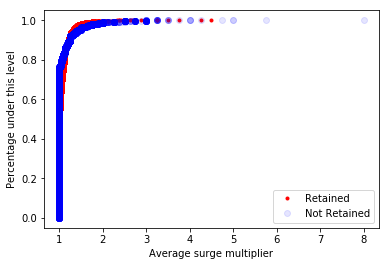

In [37]:
ret_surgmx, ret_surgmy=ecdf(retained.avg_surge)
unret_surgmx, unret_surgmy=ecdf(unretained.avg_surge)
#Plot both lines
plt.plot(ret_surgmx,ret_surgmy, color='red', linestyle='none', marker='.',)
plt.plot(unret_surgmx,unret_surgmy, color='blue' , linestyle='none', marker='o', alpha=.1)
#Label Axis
plt.xlabel('Average surge multiplier')
plt.ylabel('Percentage under this level')

#Add Legend
plt.legend(('Retained', 'Not Retained'),loc='lower right')
plt.show()

While surge rarely affects users when it does it appears those users are less likely to be retained

In [38]:
#Create categories for each piece of categorical data
ulti_df.ultimate_black_user=ulti_df.ultimate_black_user.astype('int')
df_cat= pd.get_dummies(ulti_df[['city', 'phone', 'signup_weekday']], columns=['city', 'phone', 'signup_weekday'])
ulti_df=ulti_df.join(df_cat)
ulti_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,phone_Android,phone_Computer,phone_iPhone,signup_weekday_Fri,signup_weekday_Mon,signup_weekday_Sat,signup_weekday_Sun,signup_weekday_Thurs,signup_weekday_Tues,signup_weekday_Wed
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,0,0,1,0,0,1,0,0,0,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,1,0,0,0,0,0,0,0,0,1
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,0,0,1,0,1,0,0,0,0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,0,0,1,1,0,0,0,0,0,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,1,0,0,0,1,0,0,0,0,0


In [42]:

ulti_df.columns

Index([              u'avg_dist',   u'avg_rating_by_driver',
         u'avg_rating_of_driver',              u'avg_surge',
                         u'city',         u'last_trip_date',
                        u'phone',            u'signup_date',
                    u'surge_pct', u'trips_in_first_30_days',
          u'ultimate_black_user',            u'weekday_pct',
                      u'ret_len',               u'retained',
               u'signup_weekday',           u'city_Astapor',
          u'city_King's Landing',        u'city_Winterfell',
                u'phone_Android',         u'phone_Computer',
                 u'phone_iPhone',     u'signup_weekday_Fri',
           u'signup_weekday_Mon',     u'signup_weekday_Sat',
           u'signup_weekday_Sun',   u'signup_weekday_Thurs',
          u'signup_weekday_Tues',     u'signup_weekday_Wed'],
      dtype='object')

In [44]:
column=['avg_dist','avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'ultimate_black_user',
         'trips_in_first_30_days', 'weekday_pct', 'city_Astapor','city_King\'s Landing','city_Winterfell',
        'phone_Android','phone_Computer','phone_iPhone','signup_weekday_Fri','signup_weekday_Mon',
        'signup_weekday_Sat','signup_weekday_Sun', 'signup_weekday_Thurs','signup_weekday_Tues',
        'signup_weekday_Wed','retained']

In [45]:
ulti_df[column].to_pickle('ml_ready_ultimate_data_challenge.pkl')

1. In cleaning this dataset I got rid of rows with no infor in the driver rating columns. This was eight thousand observations or 16%. I think this was better than inserting mean or median scores because these ratings may be an importnant feature and inserting the median may be misleading. I do not think this will affect the analysis because of the number of observations in the dataset. I created a target variable 'retained' for our future model. Additionally, I created some catergoric variabel to aid the model. The model and the answers to the last two questions will be in Ultimate_ML_modeling. 